<a href="https://colab.research.google.com/github/Dobarri/DL_CV_study/blob/main/w10_mvs_homography_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv_imshow 

#변환하려는 img
im = cv.imread('/content/gdrive/MyDrive/MachineVision/book2.jpg')
#corner 지정
x = np.array([[141,131,1], [480,159,1], [493,630,1], [64,601,1]])

#변환 후 img 
im_ = cv.imread('/content/gdrive/MyDrive/MachineVision/book1.jpg')
#corner 지정
x_ = np.array([[318,256,1], [534,372,1], [316,670,1], [73,473,1]])

In [ ]:
#homography 계산
A1 = np.hstack((np.zeros((len(x_),3)), -np.expand_dims(x_[:,2],axis=1)*x, np.expand_dims(x_[:,1],axis=1)*x))
A2 = np.hstack((np.expand_dims(x_[:,2],axis=1)*x, np.zeros((len(x_),3)), -np.expand_dims(x_[:,0],axis=1)*x))
A = np.vstack((A1,A2))

#svd함수는 원래 vh에 transpose를 반환함. 그래서 밑에서 vh[-1,:]해줌
u,s,vh = np.linalg.svd(A, full_matrices=True)

h = vh[-1,:]/vh[-1,-1]
h = np.reshape(h,(3,3))

In [ ]:
#opencv의 findHomography함수 사용해서 homograpy간단하게 계산 가능
#h_,status = cv.findHomography(x, x_)

In [ ]:
#warp
im_out = cv.warpPerspective(im, h, (im_.shape[1],im_.shape[0]))

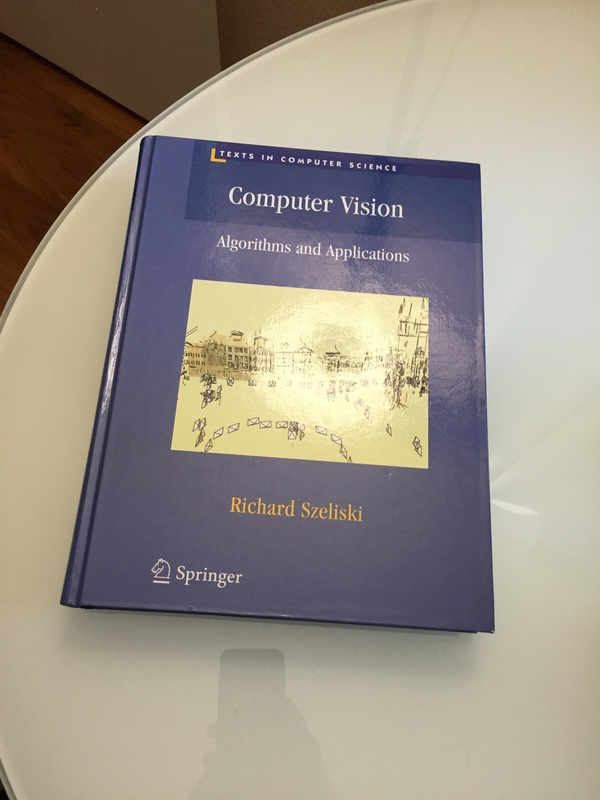

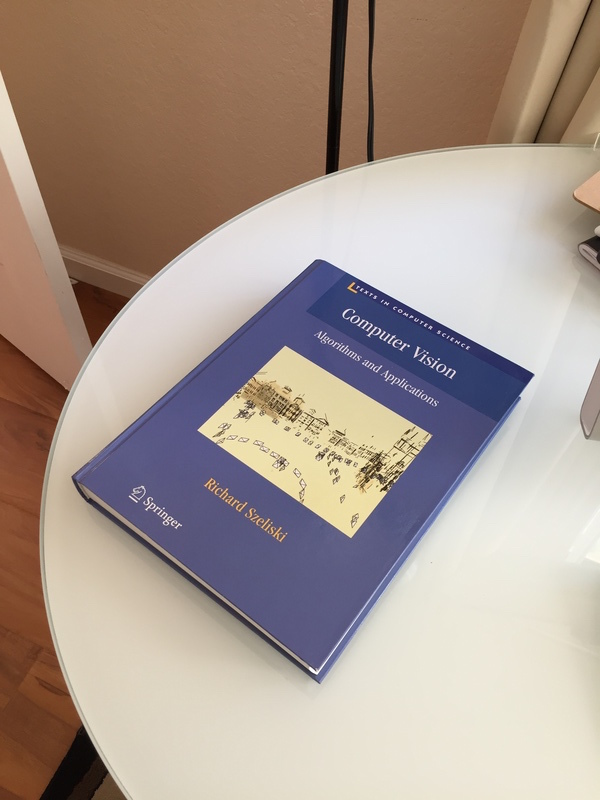

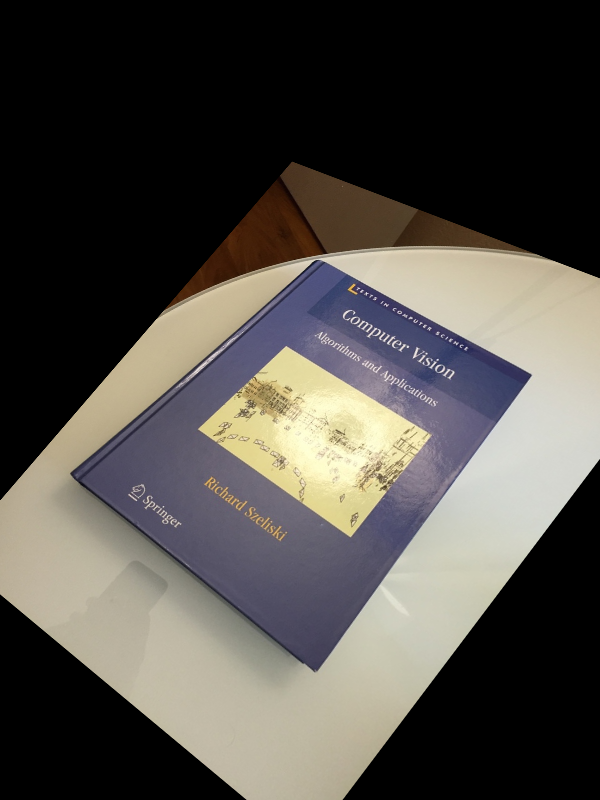

(None, None, None)

In [ ]:
#display
cv_imshow(im), cv_imshow(im_), cv_imshow(im_out)

In [ ]:
x_ = np.array([[0,0],[299,0],[299,399],[0,399]])
im_out = cv.warpPerspective(im, h, (300,400))

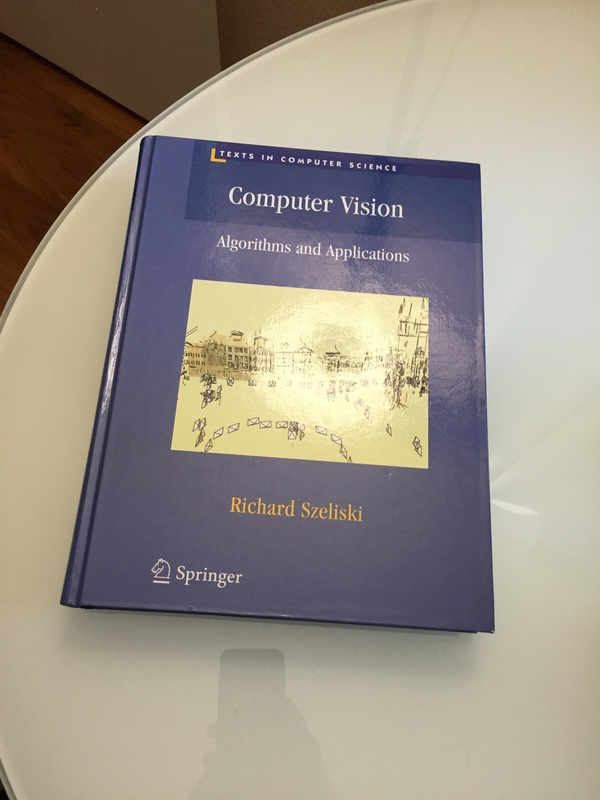

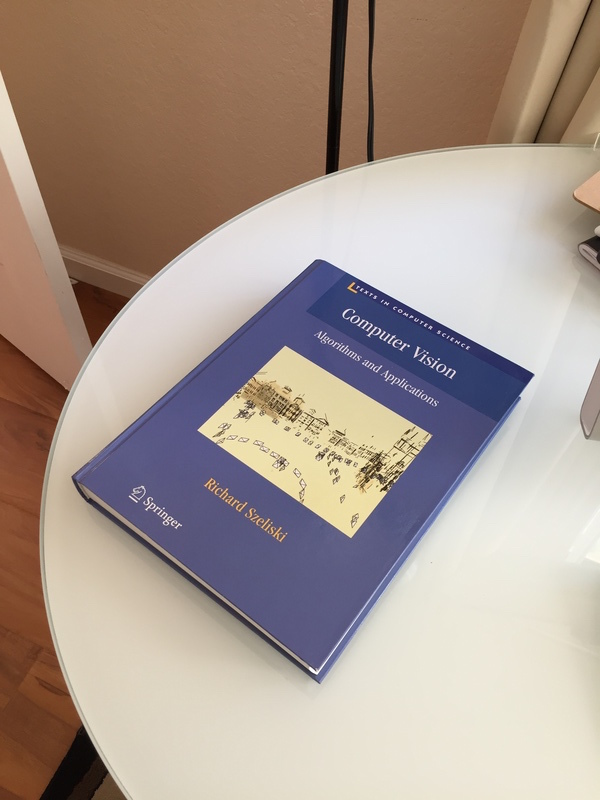

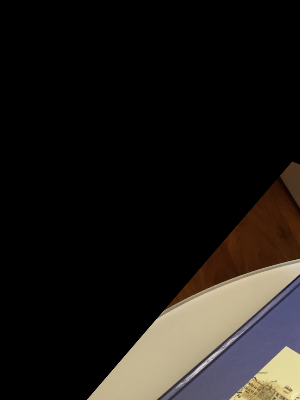

(None, None, None)

In [ ]:
#display
cv_imshow(im), cv_imshow(im_), cv_imshow(im_out)